# Proyecto Final: Detección de diabetes en pacientes

In [1]:
# Imports de librerias necesarias
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.io as sio 
from logistic_regresion import *
from support_vector_machine import *
from neuronal_networks import *
import math


In [2]:
# Función utilizada para leer un csv y extraer los datos
def load_csv(file_name):
    values = read_csv(file_name,header=None).values[1:]
    return values.astype(float)

In [3]:
# Importamos los datos
data = load_csv('data/diabetes.csv')
x_values = data[:,:-1]
y_values = data[:, -1]

print("El número de registros del conjunto de datos es: {} registros.".format(len(data)))

El número de registros del conjunto de datos es: 768 registros.


### A continuación, dividimos el conjunto de entrenamiento en los tres necesarios: entrenamiento, validacion y test

In [4]:
size = len(data)

# Entrenamiento (70%)
x_values_train = x_values[:int(size * 0.7)]
y_values_train = y_values[:int(size * 0.7)]

# Validacion (20%)
x_values_val = x_values[int(size * 0.7) : int(size * 0.7) + int(size * 0.2)]
y_values_val = y_values[int(size * 0.7) : int(size * 0.7) + int(size * 0.2)]

# Test (10%)
x_values_test = x_values[int(size * 0.7) + int(size * 0.2) :]
y_values_test = y_values[int(size * 0.7) + int(size * 0.2) :]

In [5]:
# Curvas de aprendizaje
def draw_learning_curves(x, y, x_val, y_val, model, reg=0):
    errors_train =  []
    errors_val = []
    x_values = []
    for i in range(2, len(x), 40):
        x_values.append(i)
        
        model.train(x[:i], y[:i])
        acc_train = model.get_precision(x[:i], y[:i])
        acc_val = model.get_precision(x_val, y_val)

        errors_train.append(acc_train)
        errors_val.append(acc_val)

    plt.plot(x_values, errors_train, label='Train')
    plt.plot(x_values, errors_val, label='CrossVal')
    plt.legend()

## 1 - Máquina de soporte de vectores

La precisión con el conjunto de validación es : 0.8235294117647058
La precisión con el conjunto de test es: 0.8076923076923077


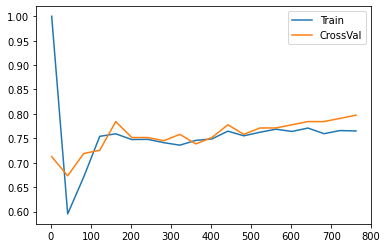

In [6]:
draw_learning_curves(x_values, y_values, x_values_val, y_values_val, SupportVectorMachine())

svm_model = SupportVectorMachine()
svm_model.train(x_values_train, y_values_train)

# Optimizamos la precisión probando con distintos parámetros y quedándonos con la mejor combinación
svm_model.optimize(x_values, y_values, x_values_val, y_values_val)

print("La precisión con el conjunto de validación es : {}".format(svm_model.get_precision(x_values_val, y_values_val)))
print("La precisión con el conjunto de test es: {}".format(svm_model.get_precision(x_values_test, y_values_test)))

## 2 - Regresión Logística

La precision con el conjunto de validación es: 0.7450980392156863
La precision con el conjunto de test es: 0.6410256410256411


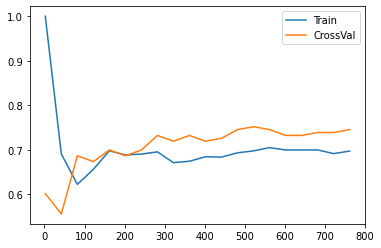

In [7]:
draw_learning_curves(x_values, y_values, x_values_val, y_values_val, LogisticRegresion())

log_reg_model = LogisticRegresion()
log_reg_model.train(x_values_train, y_values_train)

# Optimizamos la precisión probando con distintos parámetros y quedándonos con la mejor combinación
log_reg_model.optimize(x_values, y_values, x_values_val, y_values_val)


print("La precision con el conjunto de validación es: {}".format(log_reg_model.get_precision(x_values_val, y_values_val)))
print("La precision con el conjunto de test es: {}".format(log_reg_model.get_precision(x_values_test, y_values_test)))


## 3 - Redes Neuronales

La precision con el conjunto de validación es: 0.7450980392156863
La precision con el conjunto de test es: 0.6666666666666666


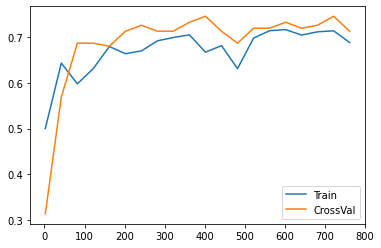

In [8]:
draw_learning_curves(x_values, y_values, x_values_val, y_values_val, NeuronalNetWork())

nn_model = NeuronalNetWork()
nn_model.train(x_values_train, y_values_train)

# Optimizamos la precisión probando con distintos parámetros y quedándonos con la mejor combinación
nn_model.optimize(x_values, y_values, x_values_val, y_values_val)


print("La precision con el conjunto de validación es: {}".format(nn_model.get_precision(x_values_val, y_values_val)))
print("La precision con el conjunto de test es: {}".format(nn_model.get_precision(x_values_test, y_values_test)))

## 4 - Librería externa
En este apartado vamos a observar la precisión de un modelo de red neuronal creado a partir de alguna librería externa, para comprar si hay diferencias notorias en cuanto a eficiencia.